In [1]:
import numpy as np
import matplotlib.pyplot as plt

from network_models.erdos_renyi_network import erdos_renyi_network
from network_models.scale_free_network import scale_free_network

In [15]:
N = 100
c = 2.541857
gamma = 4

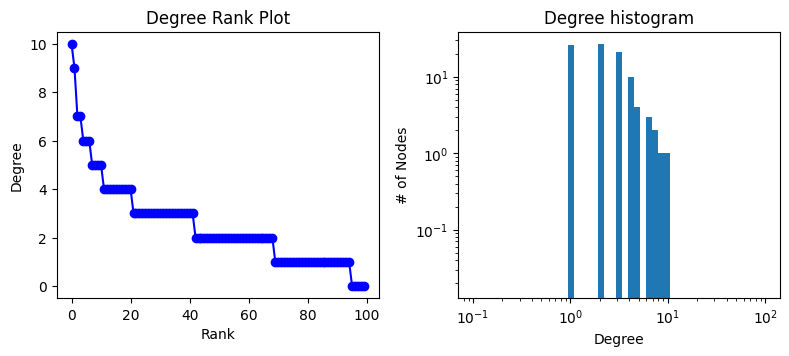

In [17]:
G = scale_free_network({
    'num_nodes': N,
    'mean_degree': c,
    'exponent': gamma,
})
# G = erdos_renyi_network({
#     'num_nodes': 1000,
#     'mean_degree': 4,
# })

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.hist(degree_sequence, bins=np.logspace(np.log10(0.1), np.log10(len(G)), 50))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(np.exp(np.arange(1, np.log10(len(G)))), np.exp(-gamma * np.arange(1, np.log10(len(G)))))

fig.tight_layout()
plt.show()

In [18]:
mean_degree = np.mean([d for _, d in G.degree])
mean_degree, c

(2.54, 2.541857)